In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv') # Training set is already available
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check basic info about the data set including missing value


In [4]:
t=train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
d=train.describe()
d

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Exploratory analysis and plots

#### Plot a bar diagram to check the number of numeric entries

    From the bar diagram, it shows that there are some age entries missing as the number of count for 'Age' is less than the other counts. We can do some impute/transformation of the data to fill-up the missing entries.

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

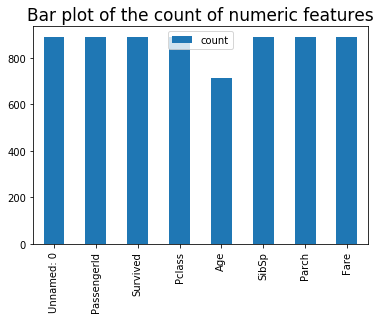

In [6]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

#### Check the relative size of survived and not-survived

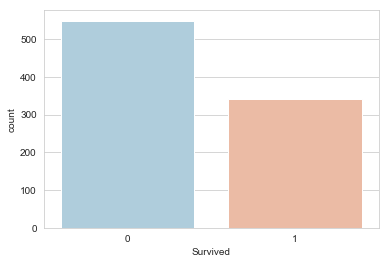

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

#### Is there a pattern for the survivability based on sex?

    It looks like more female survived than males!

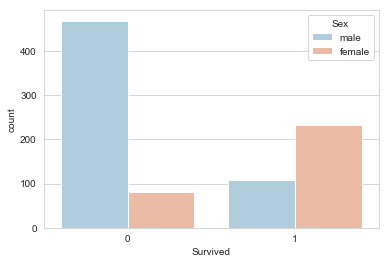

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

#### What about any pattern related to passenger class?

    It looks like disproportionately large number of 3rd class passengers died!

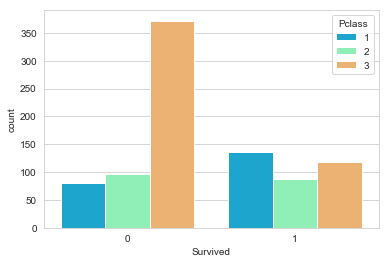

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

#### Following code extracts and plots the fraction of passenger count that survived, by each class

Text(0.5, 1.0, 'Fraction of passengers survived by class')

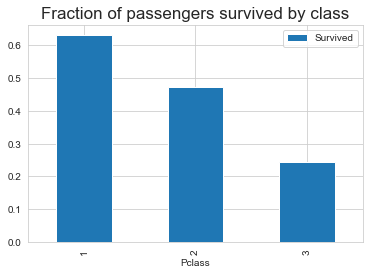

In [11]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

#### What about any pattern related to having sibling and spouse?
    
    It looks like there is a weak trend that chance of survibility increased if there were more number of sibling or spouse

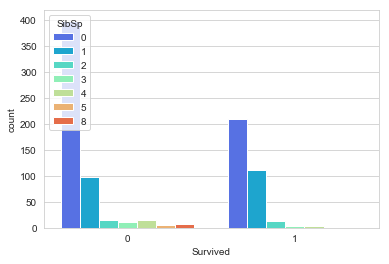

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')

#### How does the overall age distribution look like?

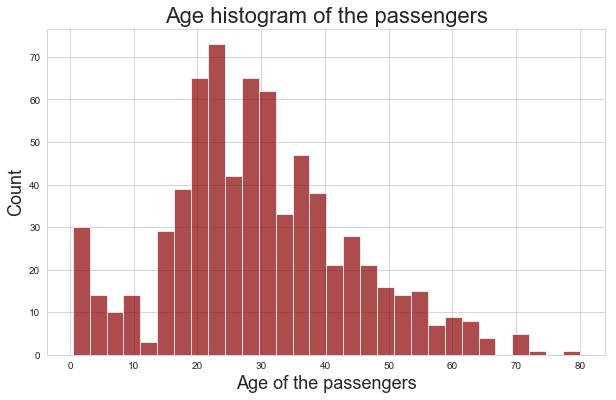

In [13]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

#### How does the age distribution look like across passenger class?

    It looks like that the average age is different for three classes and it generally decreases from 1st class to 3rd class.

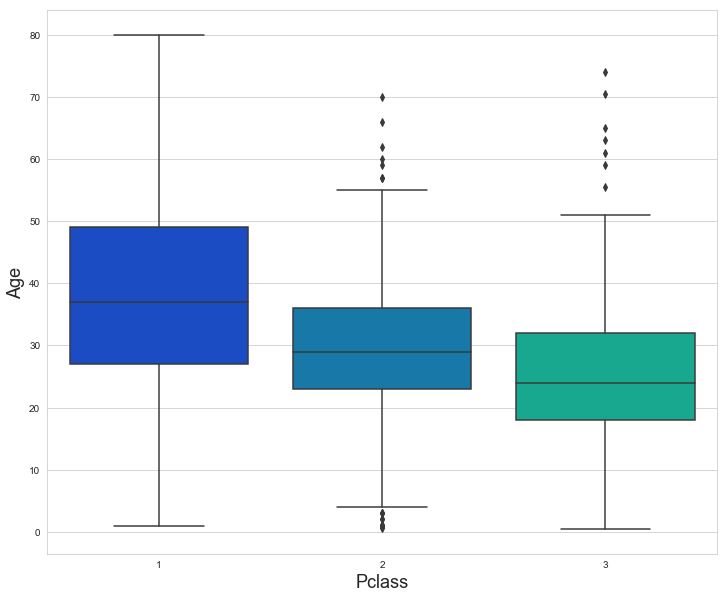

In [14]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Text(0.5, 0, 'Passenger class')

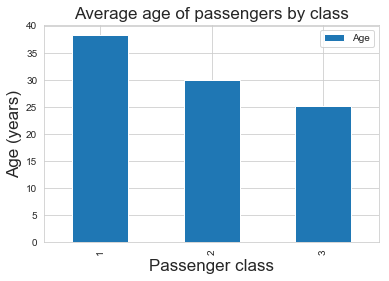

In [16]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)